# Notebook 10

In this notebook, we test basic predictive modelling approaches including the spatial encodings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

import pyproj as proj
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import data_processing_helper as dp
import practical_functions as pf
import geoplot as gplt
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")


###
# For categorical encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
# Compute the distances between all surveys 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,  cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import RepeatedKFold

from helper_model import *


import statsmodels.api as sm
from sklearn import tree

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from statistics import mean, stdev




/home/lavinia/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv("../Data/Final_dataframe_30_05.csv")
df_untouched = df

<AxesSubplot:xlabel='pr_hard_coral', ylabel='Count'>

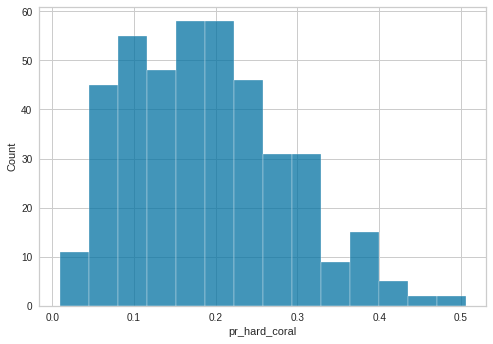

In [3]:
# pr_hard_coral
sns.histplot(df["pr_hard_coral"])

<AxesSubplot:xlabel='dist_marine_protection', ylabel='Count'>

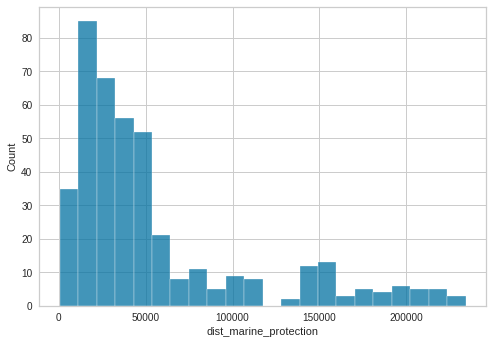

In [4]:
sns.histplot(df["dist_marine_protection"])

<AxesSubplot:xlabel='closest_port', ylabel='Count'>

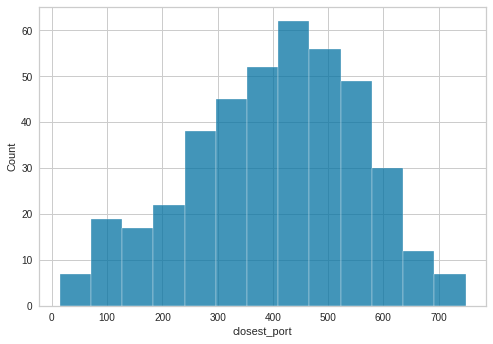

In [5]:
sns.histplot(df["closest_port"])

<AxesSubplot:xlabel='DHW_120_monthly_avg', ylabel='Count'>

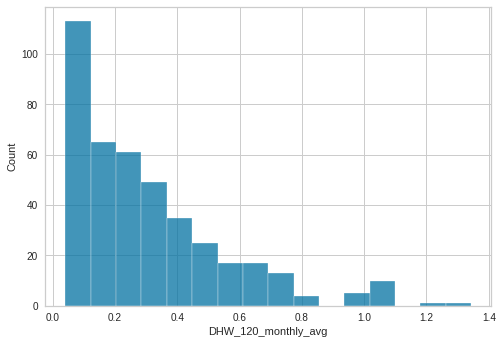

In [6]:
sns.histplot(df["DHW_120_monthly_avg"])


<AxesSubplot:title={'center':'Missing values data '}>

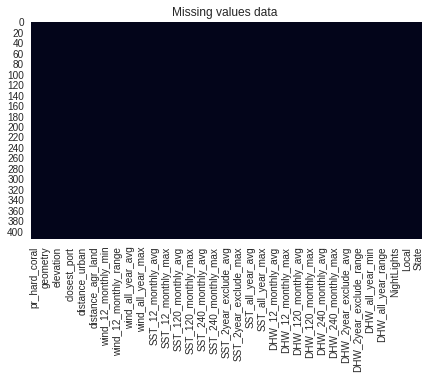

In [7]:
plt.figure(figsize = (7,4))
plt.title("Missing values data ")
sns.heatmap(df.isnull(), cbar=False)


#### Missing values
No missing values we keep 416x70 dimensions

In [8]:
df.describe()

,pr_hard_coral,pr_algae,Chlor,elevation,par,closest_port,year,distance_urban,dist_marine_protection,distance_agr_land,...,DHW_all_year_avg,DHW_all_year_min,DHW_all_year_max,DHW_all_year_range,Fishing_hours,NightLights,country_code,Local,Regional,State
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.189173,0.639331,0.440010,-28.653846,47.258668,401.539839,2014.367788,95089.552004,55787.185829,2.285040e+05,...,0.251066,0.251066,0.251066,0.251066,199.371571,0.072752,0.548077,49.161058,8.545673,4.971154
std,0.095338,0.128188,0.505566,74.281233,7.442807,154.543193,1.979855,65295.323434,54458.803572,3.187465e+05,...,0.118519,0.118519,0.118519,0.118519,378.906998,0.185176,0.848867,25.866581,4.067838,1.976765
min,0.009100,0.245500,0.055417,-820.000000,32.211998,14.224993,2012.000000,1957.900081,485.485645,4.268480e+04,...,0.089855,0.089855,0.089855,0.089855,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.113700,0.550375,0.149483,-34.000000,41.583499,297.682508,2012.000000,42331.961058,20367.960556,9.054385e+04,...,0.151882,0.151882,0.151882,0.151882,0.000000,0.003203,0.000000,26.750000,5.000000,3.000000
50%,0.181000,0.647950,0.255607,-9.500000,45.347999,417.432869,2014.000000,72111.708063,36986.452699,1.391616e+05,...,0.232769,0.232769,0.232769,0.232769,0.000000,0.042478,0.000000,49.000000,9.000000,5.000000
75%,0.249425,0.732350,0.471203,-2.000000,54.748000,517.366122,2016.000000,148638.802908,61214.883014,2.209613e+05,...,0.331096,0.331096,0.331096,0.331096,134.829200,0.066105,1.000000,69.000000,11.000000,6.000000
max,0.505700,0.907000,4.310281,162.000000,61.114000,748.780649,2018.000000,246168.835815,234101.388622,1.664402e+06,...,0.645722,0.645722,0.645722,0.645722,1461.022700,1.929311,3.000000,97.000000,15.000000,8.000000


## Process data 
- One hot encoding for spatial data

In [9]:
cat_data = df[['Local', 'Regional','State']]
one_hot_data = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(cat_data).toarray())
#added_hot = df.join(one_hot_data).drop(columns =['country_code', 'Local', 'Regional','State'])

In [10]:
df_drop_col = [                'pr_algae',
                      'geometry','wind_12_monthly_avg',
           'wind_2year_exclude_avg',
                'wind_all_year_min',
             'wind_all_year_max',     'wind_all_year_range',
               'SST_12_monthly_min',
            'SST_12_monthly_max',    'SST_12_monthly_range',
              'SST_120_monthly_min',
           'SST_120_monthly_max',   'SST_120_monthly_range',
              'SST_240_monthly_min',
           'SST_240_monthly_max',   'SST_240_monthly_range',
         'SST_2year_exclude_avg',   'SST_2year_exclude_min',
         'SST_2year_exclude_max', 'SST_2year_exclude_range',
                      'SST_all_year_min',
              'SST_all_year_max',      'SST_all_year_range',
                  'DHW_12_monthly_min',
            'DHW_12_monthly_max',    'DHW_12_monthly_range',
                'DHW_120_monthly_min',
           'DHW_120_monthly_max',   'DHW_120_monthly_range',
                'DHW_240_monthly_min',
           'DHW_240_monthly_max',   'DHW_240_monthly_range',
         'DHW_2year_exclude_avg',   'DHW_2year_exclude_max',
       'DHW_2year_exclude_range',        
              'DHW_all_year_min',        'DHW_all_year_max',
               'wind_12_monthly_min', 'wind_12_monthly_max', 'wind_12_monthly_range',
       'wind_all_year_avg', 'SST_12_monthly_avg', 'SST_120_monthly_avg',
       'SST_240_monthly_avg', 'SST_all_year_avg',  'DHW_all_year_avg',
       'DHW_all_year_range'
            
                   ]

In [11]:
df_drop = df.drop(columns = df_drop_col)

## Training 

In [12]:
y = df_drop["pr_hard_coral"]
X = df_drop.drop(columns = "pr_hard_coral")

## The X dataframe only contains the DHW + anthropological data

In [13]:
#X = sm.add_constant(X)

<AxesSubplot:xlabel='pr_hard_coral', ylabel='Density'>

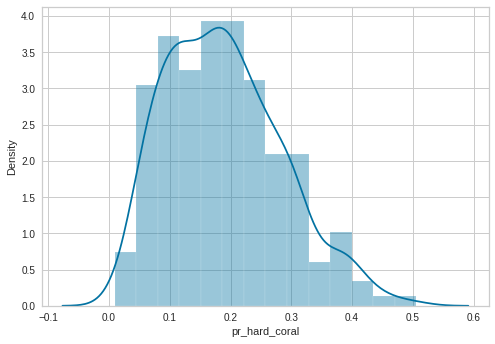

In [14]:
y_sqrt = y**(0.5)
sns.distplot(y)


<AxesSubplot:xlabel='pr_hard_coral', ylabel='Density'>

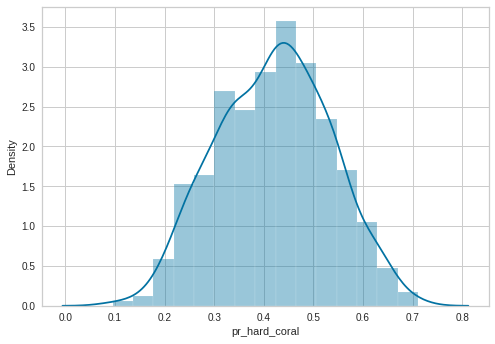

In [15]:
sns.distplot(y_sqrt)

In [16]:
print(y.skew())
y_sqrt.skew()

0.5502142284114021


-0.05038952712496018

In [17]:

data_scaler = StandardScaler().fit(X.values)
data_rescaled = data_scaler.transform(X.values)
X_scaled = pd.DataFrame(data_rescaled)
X_scaled.columns = X.columns
X_scaled = X_scaled.join(pd.get_dummies(df.country_code, prefix='Country'))


In [18]:
X = X_scaled.join(one_hot_data).drop(columns = ["country_code", "Local", "Regional", "State"])

In [19]:
# Simple corresponds to the data encoded for reproducing Oliver's results
X_simple_drop = [ 'Chlor',              'elevation',
                          'par',           'closest_port',
                         'year',         'distance_urban',
       'dist_marine_protection',      'distance_agr_land','Fishing_hours',
                  'NightLights']

In [20]:
# You have to remember to redo the opposite computation 

X_simple = X.drop(columns = X_simple_drop)

## Careful when using K-fold because the data appears in a certain order, it must thus be shuffled

Might be better to use stratified K-fold in order to keep classes in both trian nad test

In [24]:

def K_cross_validation(x,y, model, logistic_model = False):
    # Create StratifiedKFold object.
    skf = RepeatedKFold(n_splits=12,  random_state=1, n_repeats=5)
    accu = []

    for train_index, test_index in skf.split(x, y):
        
    
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        col_drop = x_train_fold.loc[:,x_train_fold.std() == 0].columns

        # Remove columns with zero standard deviation
        x_train_fold.drop(columns = col_drop, inplace = True)
        x_test_fold.drop(columns = col_drop, inplace = True)
        model.fit(x_train_fold, y_train_fold)
        if (logistic_model):
            y_pred = model.predict(x_test_fold)
            accu.append(r2_score(y_test_fold, y_pred))
            
        else:
            accu.append(model.score(x_test_fold, y_test_fold))
        


    
    print('\nMaximum that can be obtained from this model is:',
          max(accu), 'R^2')
    print('\nMinimum :',
          min(accu), 'R^2')
    print('\nOverall :',
          mean(accu), 'R^2')
    print('\nStandard deviation is:', stdev(accu), '\n')

## Linear regression 

In [25]:
#alpha = 3 was foudn after testing several values with cross validation 
model = linear_model.Ridge(alpha = 3, normalize = False,fit_intercept=True)
print(" ------------- Linear model with regression for environmental data -------------\n")
K_cross_validation(X_simple, y_sqrt, model)
model = linear_model.Ridge(alpha = 3,normalize = False,fit_intercept=True)
print(" ------------- Linear model with regression for anthropological data -------------\n")
K_cross_validation(X, y_sqrt, model)


 ------------- Linear model with regression for environmental data -------------


Maximum that can be obtained from this model is: 0.7311799426839087 R^2

Minimum : 0.10163721691698513 R^2

Overall : 0.5149162791333631 R^2

Standard deviation is: 0.1231450265539901 

 ------------- Linear model with regression for anthropological data -------------


Maximum that can be obtained from this model is: 0.759338923119619 R^2

Minimum : 0.04952835308689707 R^2

Overall : 0.5385405759429124 R^2

Standard deviation is: 0.13011374786576485 



## Tree Regressor

Max_depth


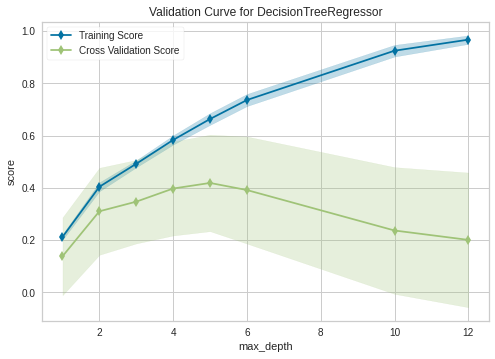

In [26]:
print("Max_depth")
cv = RepeatedKFold(n_splits=12, n_repeats=15)
param_range = [1,2,3, 4,5,6,10,12]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X, y_sqrt)
viz.show()
plt.show()

min_samples_split


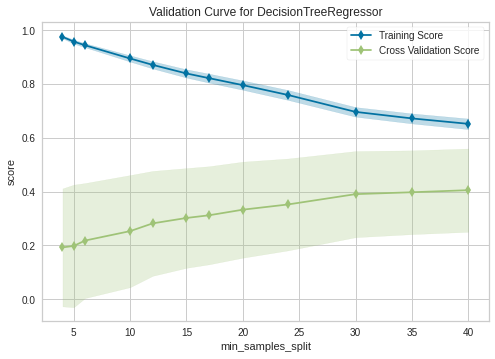

In [27]:
print("min_samples_split")
cv = RepeatedKFold(n_splits=12, n_repeats=15)
param_range = [4,5,6,10,12, 15, 17, 20, 24,30, 35, 40]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X, y_sqrt)
viz.show()
plt.show()

In [28]:


print("Environemtal MODEL")
model = DecisionTreeRegressor(criterion = "mse",max_depth=5, min_samples_split = 40)
K_cross_validation(X_simple, y_sqrt, model)

print("Anthropological MODEL")
model = DecisionTreeRegressor(criterion = "mse",max_depth=5, min_samples_split = 40)

K_cross_validation(X, y_sqrt, model)


Environemtal MODEL

Maximum that can be obtained from this model is: 0.5977531130446532 R^2

Minimum : -0.13866969401930396 R^2

Overall : 0.35256103306725217 R^2

Standard deviation is: 0.1355837488912448 

Anthropological MODEL

Maximum that can be obtained from this model is: 0.7115868935305767 R^2

Minimum : 0.017541145272778724 R^2

Overall : 0.4561651699419737 R^2

Standard deviation is: 0.1577496455528204 



## Logistic regression

In [29]:
class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

In [30]:


print("Environemtal MODEL")
model = LogitRegression()

#print(" ------------- Linear model without regression for environmental data -------------\n")
K_cross_validation(X_simple, y_sqrt, model, logistic_model= True)

print("Anthropological MODEL")
model = LogitRegression()

#print(" ------------- Linear model without regression for environmental data -------------\n")
K_cross_validation(X, y_sqrt, model, logistic_model= True)





Environemtal MODEL

Maximum that can be obtained from this model is: 0.7409035884569757 R^2

Minimum : -3.4921191973058905 R^2

Overall : 0.03021280363023156 R^2

Standard deviation is: 0.7304969078445706 

Anthropological MODEL

Maximum that can be obtained from this model is: 0.7812360738808403 R^2

Minimum : -3.3601944947350635 R^2

Overall : 0.004959471593388276 R^2

Standard deviation is: 0.7915300265076386 



## Simple model testing

This should probs be removed

In [28]:
# Because balanced data set, no need to stratify
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_sqrt, test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y_sqrt, test_size=0.20)

In [83]:
col_drop_simple = X_train_simple.loc[:,X_train_simple.std() == 0].columns

col_drop_full = X_train.loc[:,X_train.std() == 0].columns
# Remove columns with zero standard deviation
X_train_simple.drop(columns = col_drop_simple, inplace = True)
X_train.drop(columns = col_drop_full, inplace = True)
X_test_simple.drop(columns = col_drop_simple, inplace = True)
X_test.drop(columns = col_drop_full, inplace = True)

In [85]:
from helper_model import *

## add without the encoders 

### Linear Regression
Limitations:
- Not bounded !

Scored:
Return the coefficient R² of determination of the prediction. (best = 1)


Simple
R² Train without regularization =  0.7511316114455049
R² Test without regularization  =  -2.633081882666341e+21
MAE score
MAE Train without reg=  0.042955407607010485
MAE Test without reg=  1367979009.4833894
R² Train with regularization  =  0.6633559932292235
R² Test with regularization  =  0.4100793447544263
MAE score
MAE Train with reg=  0.052199517357692946
MAE Test with reg=  0.06438548785282915


<AxesSubplot:>

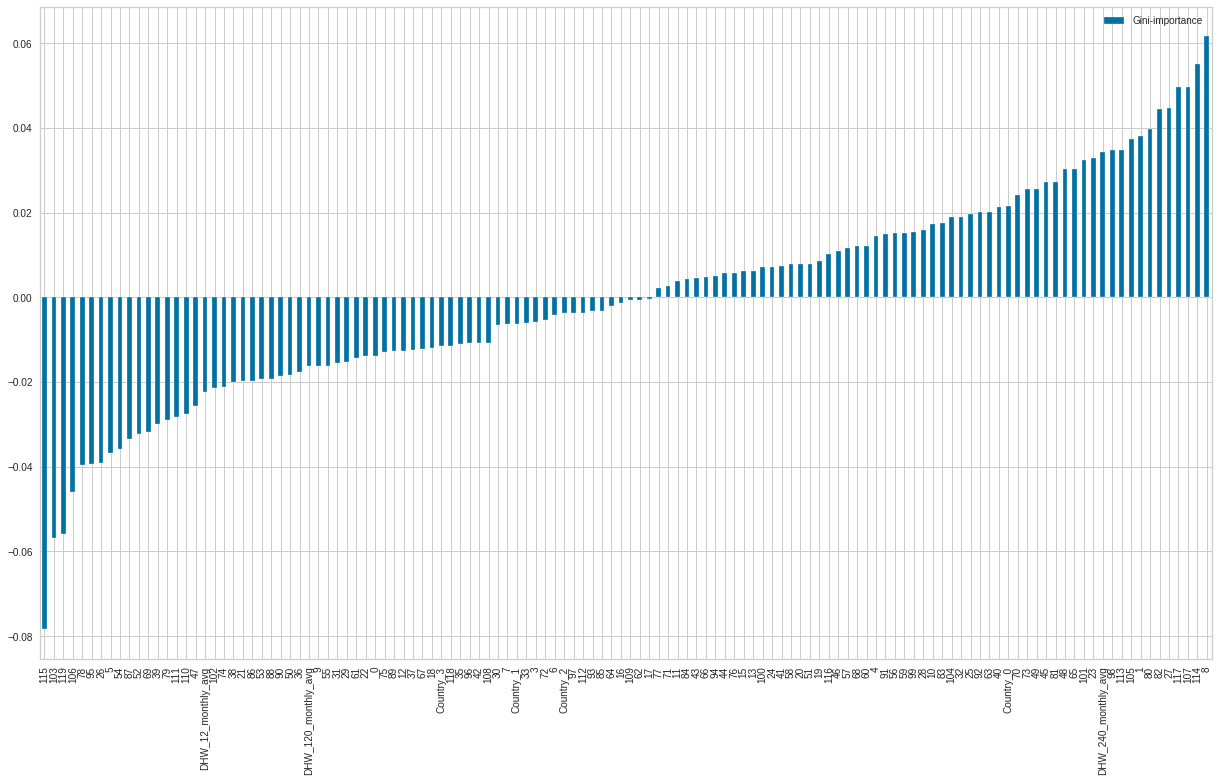

In [93]:
reg = LinearRegression(normalize = False,fit_intercept=True).fit(X_train_simple, y_train_simple)
y_train_simple_pred = reg.predict(X_train_simple)
y_test_simple_pred = reg.predict(X_test_simple)


print("Simple")
print("R² Train without regularization = ",reg.score(X_train_simple, y_train_simple))
print("R² Test without regularization  = ",reg.score(X_test_simple, y_test_simple))
print("MAE score")
print("MAE Train without reg= ", mean_absolute_error(y_train_simple, y_train_simple_pred))
print("MAE Test without reg= ", mean_absolute_error(y_test_simple, y_test_simple_pred))

# With Regu
reg = linear_model.Ridge(alpha=5,normalize = False,fit_intercept=True).fit(X_train_simple, y_train_simple)
y_train_simple_pred = reg.predict(X_train_simple)
y_test_simple_pred = reg.predict(X_test_simple)
print("R² Train with regularization  = ",reg.score(X_train_simple, y_train_simple))
print("R² Test with regularization  = ",reg.score(X_test_simple, y_test_simple))
print("MAE score")
print("MAE Train with reg= ", mean_absolute_error(y_train_simple, y_train_simple_pred))
print("MAE Test with reg= ", mean_absolute_error(y_test_simple, y_test_simple_pred))
importance = reg.coef_
# summarize feature importance
#for i,v in enumerate(importance):
 #   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_simple.columns, reg.coef_):
    feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize = (21,12))




Added data
R² Train without regularization =  0.7688858118411372
R² Test without regularization =  -1.4336828679661997e+20
MAE score
MAE Train without reg=  0.04036285488196882
MAE Test without reg=  243680996.73099142
R² Train with regularization =  0.6730332037343683
R² Test with regularization =  0.442760152703205
MAE score
MAE Train with reg =  0.11914635187675336
MAE Test with reg=  0.09752824978176543


<AxesSubplot:>

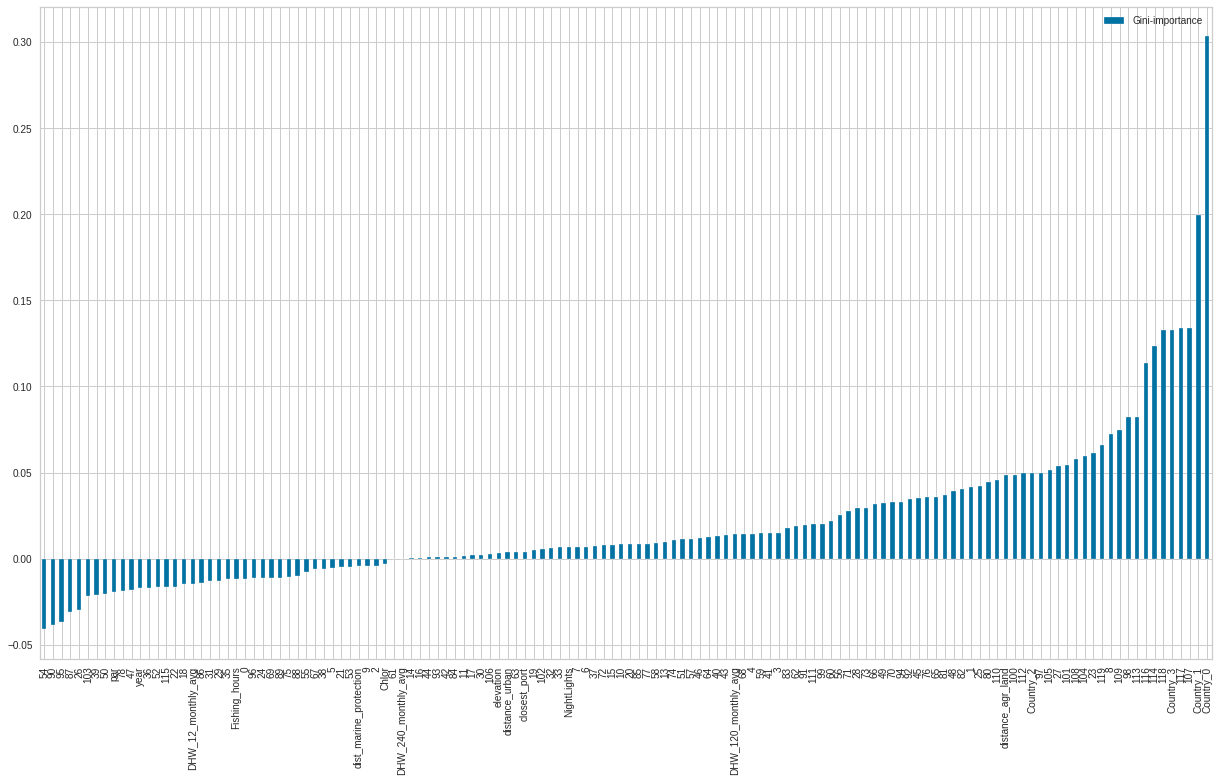

In [94]:
# With added data
reg = LinearRegression(normalize = True,fit_intercept=False).fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("Added data")
print("R² Train without regularization = ",reg.score(X_train, y_train))
print("R² Test without regularization = ",reg.score(X_test, y_test))

print("MAE score")
print("MAE Train without reg= ", mean_absolute_error(y_train, y_train_pred))
print("MAE Test without reg= ", mean_absolute_error(y_test, y_test_pred))
# With Regu
reg = linear_model.Ridge(alpha=5,normalize = True,fit_intercept=False).fit(X_train, y_train)
print("R² Train with regularization = ",reg.score(X_train, y_train))
print("R² Test with regularization = ",reg.score(X_test, y_test))
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("MAE score")
print("MAE Train with reg = ", mean_absolute_error(y_train_simple, y_train_pred))
print("MAE Test with reg= ", mean_absolute_error(y_test_simple, y_test_pred))

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, reg.coef_):
    feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize = (21,12))


## Decision Tree Regressor 

Criterion = MSE (wouldn't MAE be better ?)

In [54]:
DTR = DecisionTreeRegressor(criterion = "mse",max_depth=4).fit(X_train_simple, y_train_simple)
print("Simple Model\n Training Model\n")
print("R-Squared on train dataset={}".format(DTR.score(X_train_simple,y_train_simple)))
print('\nAccuracy of Train Data with cross validation \n :', cross_val_score(DTR, X_train_simple,y_train_simple, cv=10 ))
print("\nTest model\n")   
print("R-Squared on test dataset={}".format(DTR.score(X_test_simple,y_test_simple)))
print('\nAccuracy of Test Data :', cross_val_score(DTR, X_test_simple,y_test_simple, cv=10 ))

Simple Model
 Training Model

R-Squared on train dataset=0.46896252672087435

Accuracy of Train Data with cross validation 
 : [0.53488029 0.3510455  0.06353886 0.30888312 0.23860176 0.43038701
 0.02617458 0.11252573 0.34235887 0.41803912]

Test model

R-Squared on test dataset=0.42703964711746667

Accuracy of Test Data : [ 0.00904313 -2.13336271  0.28630669  0.00328876 -0.06323822 -0.63432451
  0.10961054 -0.22161398  0.22659673 -0.64118117]


In [57]:
DTR = DecisionTreeRegressor(criterion = "mse",max_depth=3).fit(X_train, y_train)
print("Added data Model\n Training Model\n")
print("R-Squared on train dataset={}".format(DTR.score(X_train,y_train)))
print('\nAccuracy of Train Data with cross validation \n :', cross_val_score(DTR, X_train,y_train, cv=10 ))
print("\nTest model\n")
  
print("R-Squared on test dataset={}".format(DTR.score(X_test,y_test)))
print('\nAccuracy of Test Data :', cross_val_score(DTR, X_test,y_test, cv=10 ))

Added data Model
 Training Model

R-Squared on train dataset=0.5292643831302412

Accuracy of Train Data with cross validation 
 : [0.45884302 0.43783372 0.42458987 0.36898742 0.24592268 0.12562848
 0.43640685 0.32939865 0.37168091 0.59126604]

Test model

R-Squared on test dataset=0.32284729148045177

Accuracy of Test Data : [ 1.52180976e-01 -1.64283298e-01 -9.33190586e-01 -5.83822114e-02
 -1.00009890e-01 -3.57939706e-01 -1.03730971e+00  2.06107334e-01
  1.03385781e-03 -5.07346653e-01]


## Logistic workaround ?
- Limitations

Need for adding regularization ? 

In [142]:

class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)



In [143]:

model = LogitRegression()
model.fit(X_train_simple, y_train_simple)

y_train_pred_simple = model.predict(X_train_simple)
y_test_pred_simple = model.predict(X_test_simple)

print("Simple model R² score\n")
print("Train = ", r2_score(y_train_simple, y_train_pred_simple))
print("Test = ", r2_score(y_test_simple, y_test_pred_simple))

print("\nSimple model MAE score\n")
print("Train = ", mean_absolute_error(y_train_simple, y_train_pred_simple))
print("Test = ", mean_absolute_error(y_test_simple, y_test_pred_simple))




Simple model R² score

Train =  0.7218840491612724
Test =  0.03623877955667376

Simple model MAE score

Train =  0.04628840611900414
Test =  0.06356050267727473


In [147]:
model = LogitRegression()
model.fit(X_train, y_train)

y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Added model R² score\n")
print("Train = ", r2_score(y_train, y_train_pred))
print("Test = ", r2_score(y_test, y_test_pred))
print("\nAdded model MAE score\n")
print("Train = ", mean_absolute_error(y_train, y_train_pred))
print("Test = ", mean_absolute_error(y_test, y_test_pred))

Added model R² score

Train =  0.7702896600074717
Test =  0.3008962398787951

Added model MAE score

Train =  0.03840814309178572
Test =  0.0714565619996722


In [151]:
model

if (LogitRegression() == model):
    print("yesj")
    

NameError: name 'metrics' is not defined